Gene Expression Data Visualization and Analysis

Overview:
This notebook visualizes the distribution of the mean expression ratio of genes per sample from single-cell RNA sequencing (scRNA-seq) data. 

The workflow involves:

1. Loading the previously computed gene statistics from a CSV file.
2. Plotting histograms of the mean gene expression ratio.
4. Visualizing the log-transformed distribution to check for normalization.

In [2]:
# Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

In [3]:
# Load the gene statistics CSV file generated from the 'preprocess' script
gene_stats_1 = pd.read_csv("C3L-03405_1.csv")
gene_stats_2 = pd.read_csv("C3N-00148_3.csv")
gene_stats_3 = pd.read_csv("C3N-00662_1.csv")
gene_stats_4 = pd.read_csv("C3N-03188_1.csv")

In [7]:
# Function to plot histograms with: original data on a linear scaled x-axis, original data on a log-scaled x-axis, 
# and log transformed data on a linear scaled x-axis
def plot_transformations(data, column):
    """
    Plots histograms with different x-axes and transformed data.
    
    Parameters:
    - data: DataFrame, the gene statistics data
    - column: str, the column name to plot (e.g., 'Mean' or 'Variance')
    """
    # Original data
    original = data[column]
    
    # Log-transformed data (using log2 for easier interpretation)
    log2_transformed = np.log2(original)

    fig, axes = plt.subplots(3, 1, figsize=(12, 18))

    # Original data on linear scale
    sns.histplot(original, kde=True, ax=axes[0], bins=100)
    axes[0].set_title('Original Mean Expression Distribution (Linear Scale)')
    axes[0].set_xlabel('Mean Expression Ratio')
    axes[0].set_ylabel('Count')

    # Original data on log scale
    sns.histplot(original, kde=True, ax=axes[1], bins=100, log_scale=True)
    axes[1].set_title('Original Mean Expression Distribution (Log Scale)')
    axes[1].set_xlabel('Mean Expression Ratio')
    axes[1].set_ylabel('Count')

    # Log10-transformed data
    sns.histplot(log2_transformed, kde=True, ax=axes[2], bins=100)
    axes[2].set_title('Log2-Transformed Mean Expression Distribution')
    axes[2].set_xlabel('Log2(Mean Expression Ratio)')

    plt.tight_layout()
    plt.show()

    # Print summary statistics
    print("Original data summary:")
    print(original.describe())
    print("\nLog2-transformed data summary:")
    print(log2_transformed.describe())

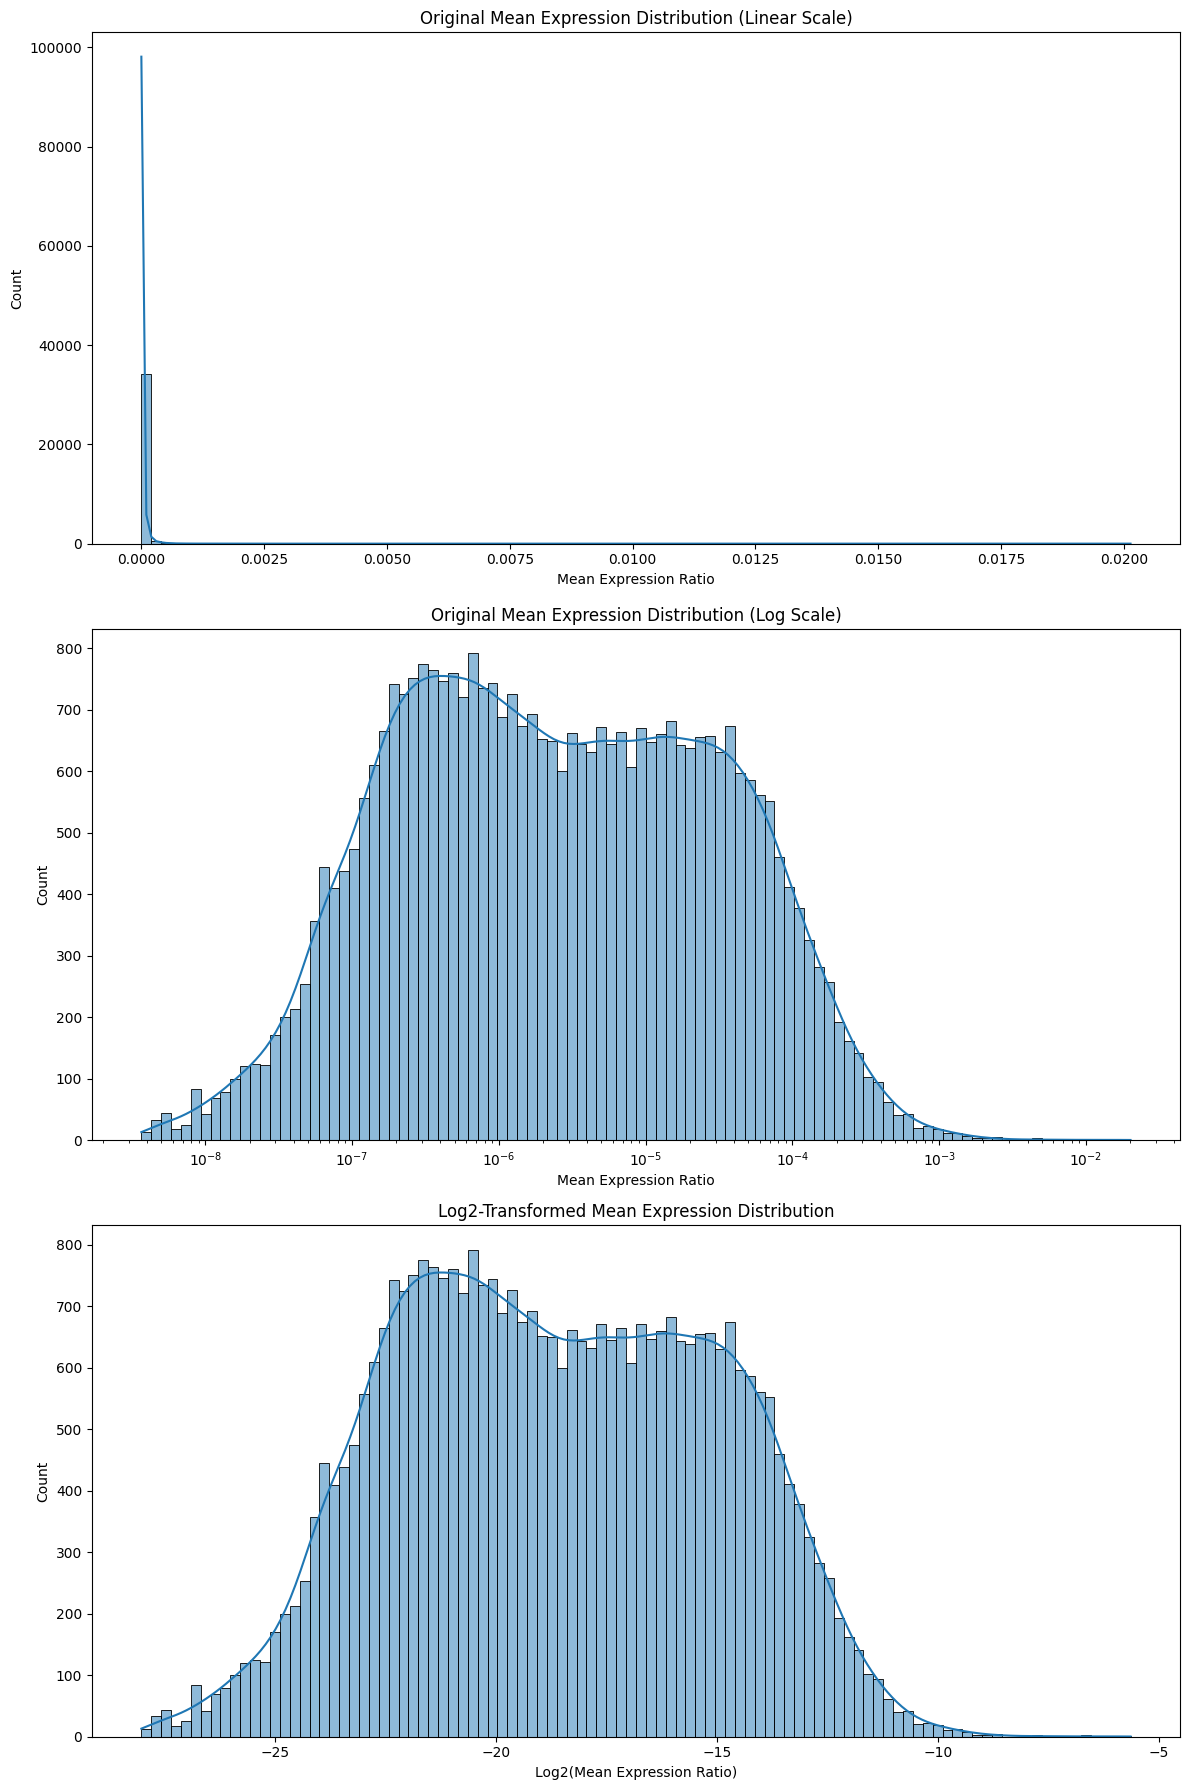

Original data summary:
count    3.504800e+04
mean     2.851525e-05
std      1.821085e-04
min      3.662975e-09
25%      3.369768e-07
50%      2.211258e-06
75%      1.796802e-05
max      2.013623e-02
Name: Mean, dtype: float64

Log2-transformed data summary:
count    35048.000000
mean       -18.661239
std          3.580345
min        -28.024337
25%        -21.500847
50%        -18.786701
75%        -15.764209
max         -5.634063
Name: Mean, dtype: float64


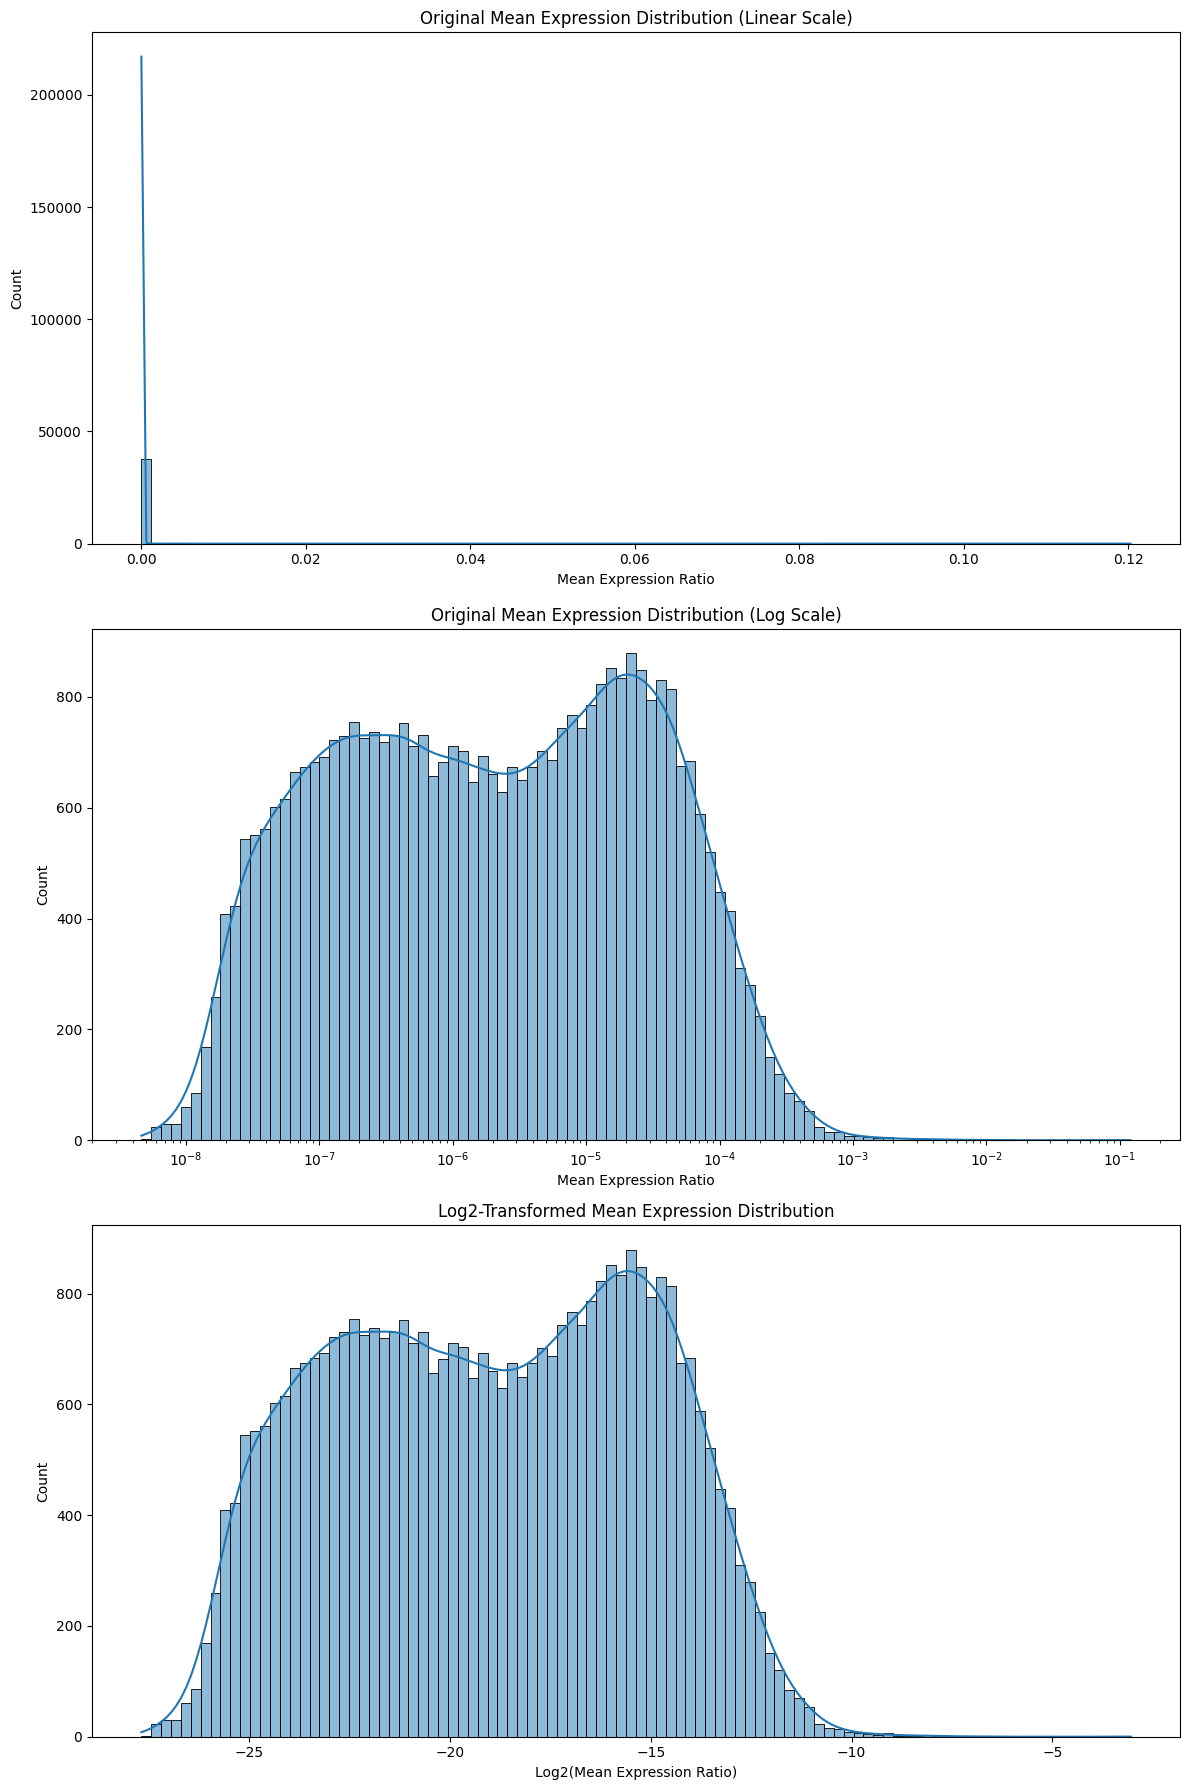

Original data summary:
count    3.759300e+04
mean     2.658609e-05
std      6.282218e-04
min      4.651326e-09
25%      2.039451e-07
50%      1.980939e-06
75%      1.793252e-05
max      1.202885e-01
Name: Mean, dtype: float64

Log2-transformed data summary:
count    37593.000000
mean       -19.002904
std          3.810345
min        -27.679711
25%        -22.225316
50%        -18.945384
75%        -15.767062
max         -3.055429
Name: Mean, dtype: float64


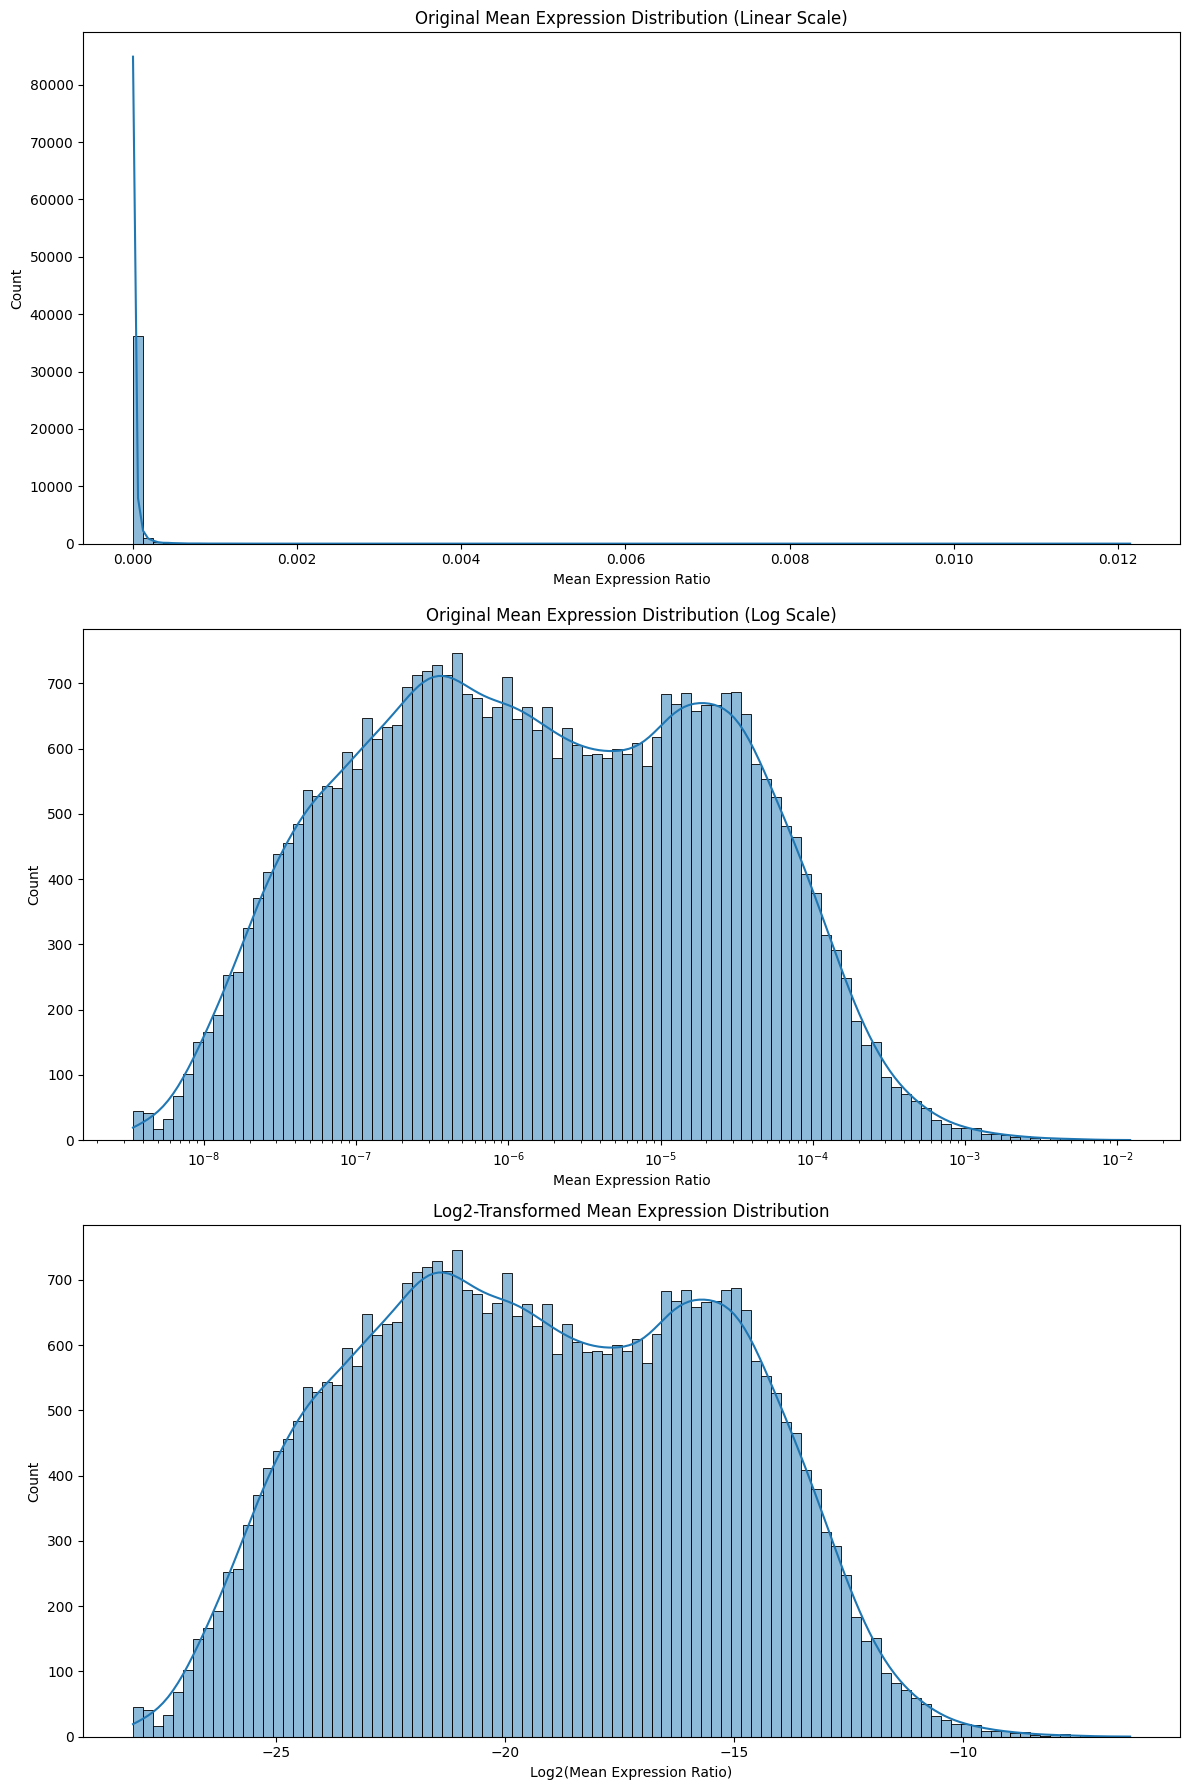

Original data summary:
count    3.782600e+04
mean     2.642398e-05
std      1.364134e-04
min      3.427408e-09
25%      1.918352e-07
50%      1.514512e-06
75%      1.532976e-05
max      1.215058e-02
Name: Mean, dtype: float64

Log2-transformed data summary:
count    37826.000000
mean       -19.220728
std          3.890038
min        -28.120235
25%        -22.313629
50%        -19.332715
75%        -15.993305
max         -6.362832
Name: Mean, dtype: float64


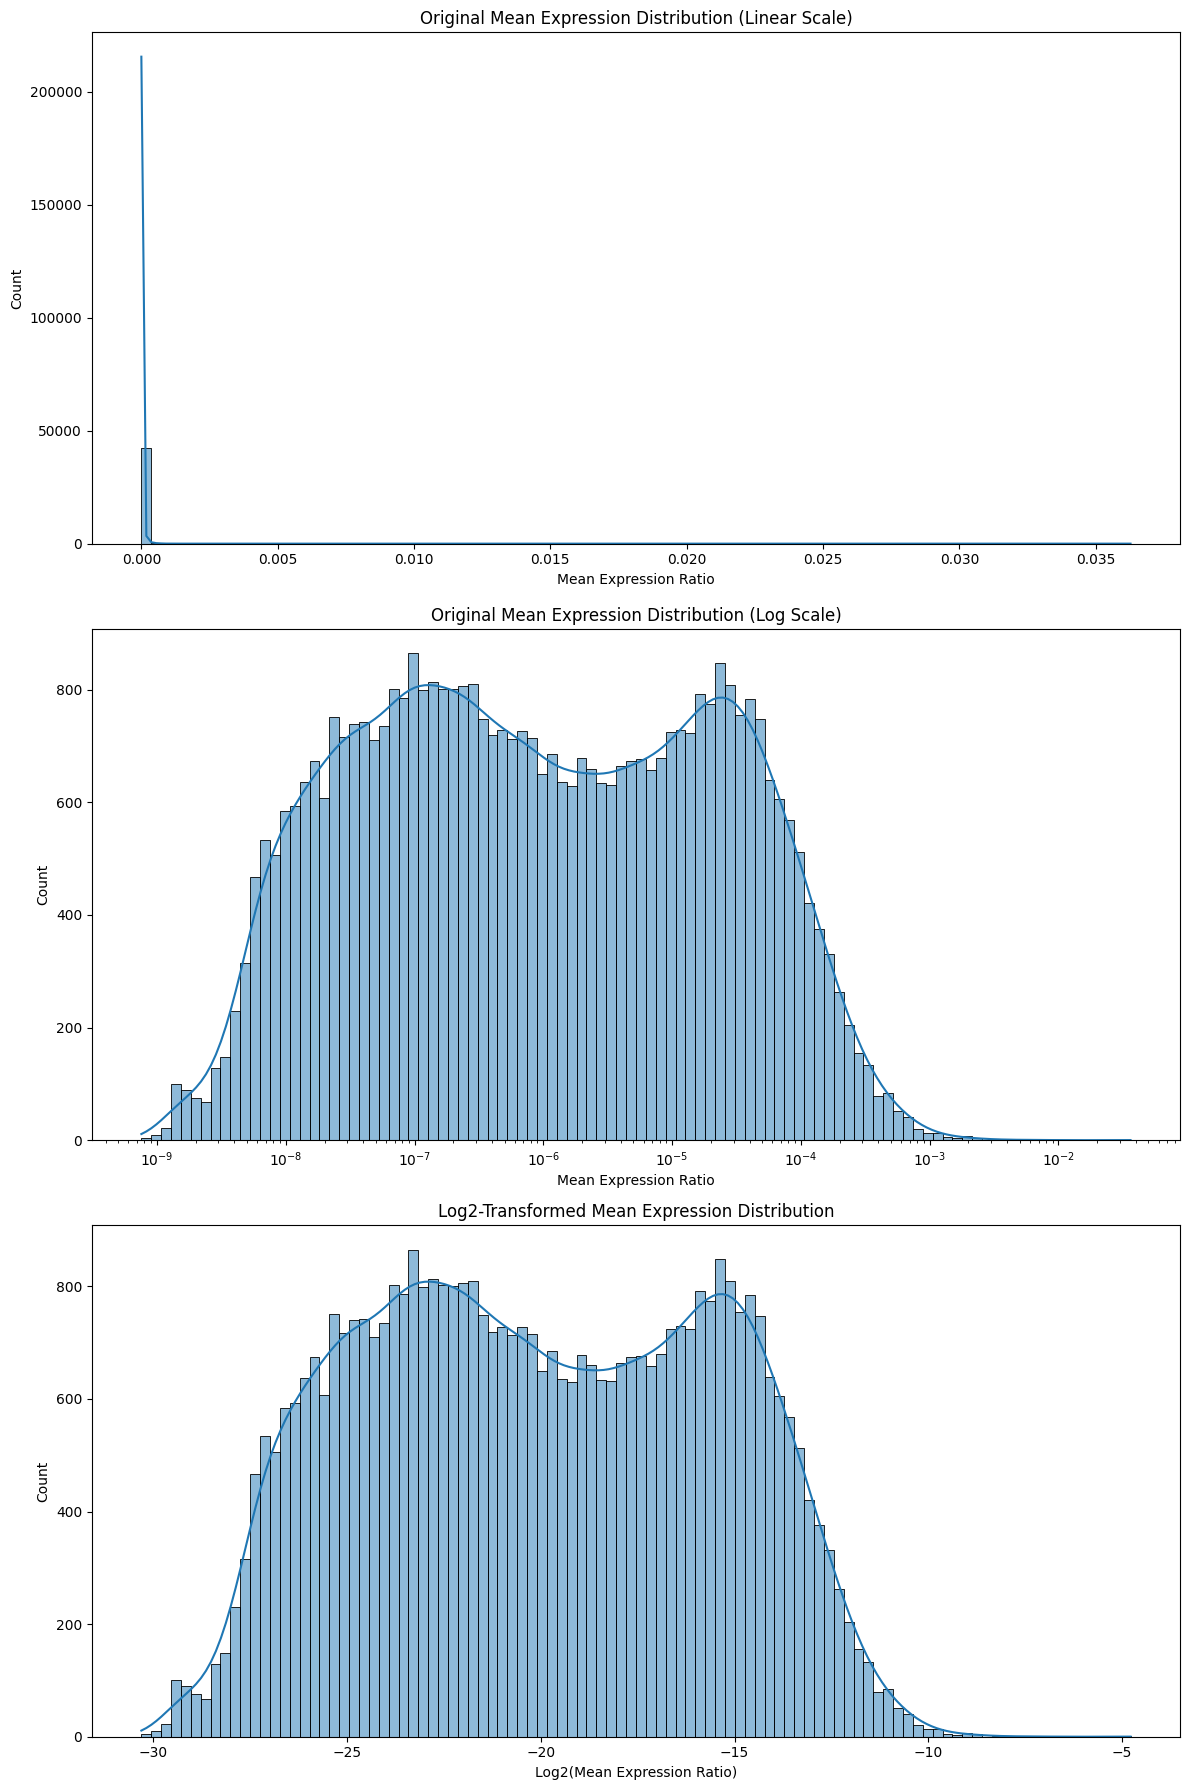

Original data summary:
count    4.260000e+04
mean     2.346604e-05
std      1.969636e-04
min      7.567621e-10
25%      6.961273e-08
50%      7.883115e-07
75%      1.308962e-05
max      3.627746e-02
Name: Mean, dtype: float64

Log2-transformed data summary:
count    42600.000000
mean       -20.095305
std          4.463944
min        -30.299441
25%        -23.776074
50%        -20.274731
75%        -16.221217
max         -4.784783
Name: Mean, dtype: float64


In [8]:
# Call the function to plot the transformations
plot_transformations(gene_stats_1, 'Mean')
plot_transformations(gene_stats_2, 'Mean')
plot_transformations(gene_stats_3, 'Mean')
plot_transformations(gene_stats_4, 'Mean')

Plotting original data on a log scale is mathematically equivalent to plotting log-transformed data on a linear scale.

Second graph: You read actual expression values, but they're spaced logarithmically.
Third graph: You read log10 of expression values directly.

- Confirms that log transformation is appropriate for the data
- Shows that the data likely follows a log-normal distribution